In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
X_data = []
Y_data = []

for i in range(200):
    points = np.random.randint(5, 10, 2)
    X_data.append(points)
    Y_data.append(np.zeros(1))
for i in range(200):
    points = np.random.randint(12, 17, 2)
    X_data.append(points)
    Y_data.append(np.ones(1))

In [3]:
X_data = np.array(X_data)
Y_data = np.array(Y_data)

In [4]:
X_data.shape, Y_data.shape

((400, 2), (400, 1))

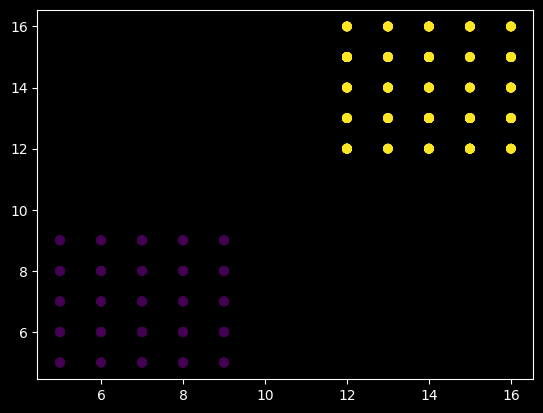

In [5]:
plt.scatter(X_data[:, 0], X_data[:, 1], c = Y_data)

In [6]:
# np.random.shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [7]:
X_data, Y_data = shuffle(X_data, Y_data, random_state = 52642)

In [8]:
split = 0.8
train_X, test_X, train_Y, test_Y = train_test_split(X_data, Y_data, test_size = 0.2)

In [9]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(320, 2) (80, 2) (320, 1) (80, 1)


In [10]:
class KNN:
    
    def __init__(self, k, X, Y):
        self.k = k
        self.X = X
        self.Y = Y
        
    def distance_formula(self, p1, p2):
        return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5
    
    def predict(self, test_point):
        distance = []
        
        for i in range(self.X.shape[0]):
            distance.append((self.distance_formula(test_point, self.X[i]), i))
            
        distance = sorted(distance, key = lambda x: x[0])
        k_distance = distance[:self.k]
        
        classes = []
        
        for _, i in k_distance:
            classes.append(self.Y[i])
        
        type_class, class_count = np.unique(classes, return_counts = True)
        
        max_class = np.argmax(class_count)
        
        print(f'Predicted Class: {type_class[max_class]}, with Probability of: {class_count[max_class]/np.sum(class_count)}')
        
        return type_class[max_class]

In [11]:
# a = np.array([1,2,1,0,21,0,5,5,1,2,3,1,1,2,1,1,23,3,1,1,1,1,2])
# print(np.unique(a, return_counts=True))

In [12]:
knn_classifier = KNN(5, train_X, train_Y)

In [19]:
knn_classifier.predict([10.5, 10.5])

Predicted Class: 1.0, with Probability of: 1.0


1.0

In [14]:
y_pred = []

for i in range(test_X.shape[0]):
    y_pred.append(knn_classifier.predict(test_X[i]))
    print(knn_classifier.predict(test_X[i]), test_Y[i])

Predicted Class: 1.0, with Probability of: 1.0
Predicted Class: 1.0, with Probability of: 1.0
1.0 [1.]
Predicted Class: 0.0, with Probability of: 1.0
Predicted Class: 0.0, with Probability of: 1.0
0.0 [0.]
Predicted Class: 1.0, with Probability of: 1.0
Predicted Class: 1.0, with Probability of: 1.0
1.0 [1.]
Predicted Class: 0.0, with Probability of: 1.0
Predicted Class: 0.0, with Probability of: 1.0
0.0 [0.]
Predicted Class: 0.0, with Probability of: 1.0
Predicted Class: 0.0, with Probability of: 1.0
0.0 [0.]
Predicted Class: 0.0, with Probability of: 1.0
Predicted Class: 0.0, with Probability of: 1.0
0.0 [0.]
Predicted Class: 1.0, with Probability of: 1.0
Predicted Class: 1.0, with Probability of: 1.0
1.0 [1.]
Predicted Class: 0.0, with Probability of: 1.0
Predicted Class: 0.0, with Probability of: 1.0
0.0 [0.]
Predicted Class: 0.0, with Probability of: 1.0
Predicted Class: 0.0, with Probability of: 1.0
0.0 [0.]
Predicted Class: 1.0, with Probability of: 1.0
Predicted Class: 1.0, with

In [17]:
def accuracy(preds, labels):
    corr = 0
    for i in range(preds.shape[0]):
        if preds[i] == labels[i]:
            corr+=1
    return corr/preds.shape[0]

In [18]:
print(accuracy(y_pred, test_Y))

1.0
